<h1>
<center>
Assignment 2: Classification and locally weighted regression
</center>
</h1>
<center>
CS 4262/5262 - Foundations of Machine Learning<br>
Vanderbilt University, Spring 2023<br>
Due: Check Brightspace
</center>
<hr>
<br>This assignment will focus on logistic regression (for binary classification) and locally weighted linear regression. For each algorithm, we have provided a class framework as a suggestion, but you are not required to use those in your implementation. Please use good programming practices - include informative comments and vectorize operations whenever possible. In addition to programming tasks, there are short-answer questions throughout the notebook. 

Contact: Quan Liu quan.liu@vanderbilt.edu for any clarifying questions.

### Please enter your name:  Mary Stirling Brown
---



In [1]:
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy as sp
from sklearn import datasets

--- 
## Part 0: Data


You will be applying binary classification to two different datasets: the [Iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) dataset and the wine quality dataset (Data Source :https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The Iris dataset is smaller and simpler, and therefore may be useful for debugging. This dataset consists of measurements (septal and petal length and width) of 50 samples from each of 3 species of Iris flower. The wine quality dataset is more complex, and the classification task is to predict whether a sample should be red wine or white wine given the feature.

**Task 1**
- Load the Iris dataset from scikit-learn. (refer to [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html))
- Here, we will represent each sample by 2 of the 4 available features: petal width and petal length. 
- Display a scatterplot of the data, such that: 
    * the x- and y- axes correspond to the two features (petal width, petal length)
    * the axes are labelled 
    * points are colored according to class membership
    * the legend describes which iris type (class) is represented by each color

**Question 1:  Which classes appear to be linearly separable in this feature space?**

Response: The setosa class appears to be the most linearly separable in this feature space because it is the most separated from the other two. Versicolor and virginica classes have some overlap of points, so linearly separating them may not be as accurate as it would for the setosa class.

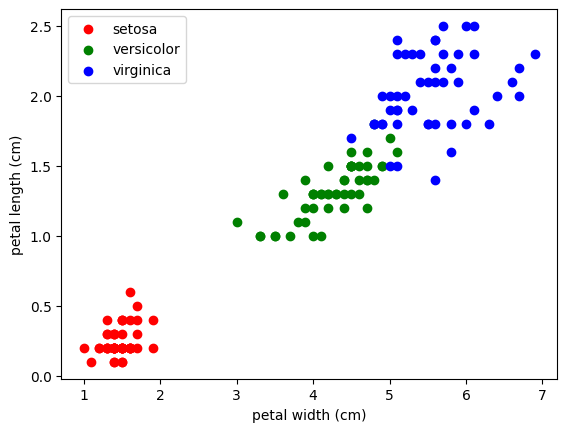

In [2]:
# TODO - Iris dataset
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

color = ['red', 'green', 'blue']
fig, ax = plt.subplots()
for i in range(len(iris.target_names)):
    ax.scatter(iris.data[iris.target == i, 2],  iris.data[iris.target == i, 3], label = iris.target_names[i], c = color[i])
ax.set_xlabel(iris.feature_names[3])
ax.set_ylabel(iris.feature_names[2])
ax.legend()
plt.show()

**Task 2**
- Load the wine dataset given in the brightspace.
    * we have 1600 lines of white wine data and 1599 lines of red wine data
    * white/red wine is labeled as 0/1
    * each sample has 11 dimensions of features with the same order as [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol] and one dimension of label
- Here, we will represent each sample by 3 features (using mpl_toolkits.mplot3d.Axes3D): 
- Similar to the Iris dataset, display a scatterplot of the data such that: "volatile acidity", "fixed acidity", and "residual sugar".
    * the x-, y-, and z- axes correspond to the features
    * the axes are labelled 
    * the sample point is colored based on the class
    * the legend specifies the label associated with each color

<IPython.core.display.Javascript object>


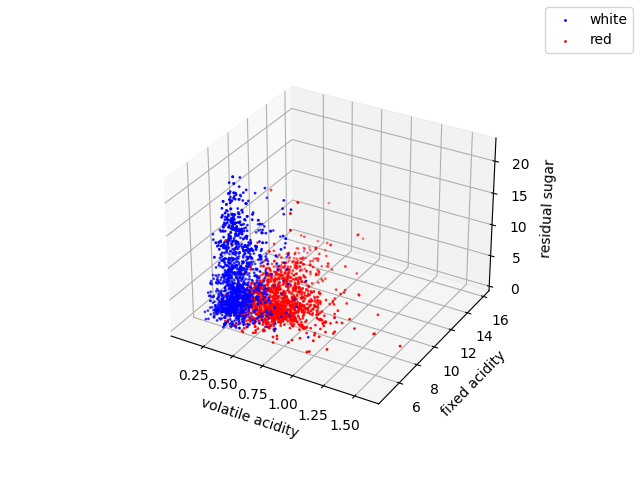

In [23]:
#TODO - wine quality dataset
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

wine = pd.read_csv('C:\\Users\\marys\\OneDrive\\Documents\\MachineLearning\\cs4262-5262-2023S\\Assignment2\\assignment2-wine_quality.csv')

wine_type = wine["label"]
features = wine.loc[:, wine.columns != "label"]

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(features[wine_type == 0]["volatile acidity"], features[wine_type == 0]["fixed acidity"], 
           features[wine_type == 0]["residual sugar"], label = "white", c = "blue", s = 1)
ax.scatter(features[wine_type == 1]["volatile acidity"], features[wine_type == 1]["fixed acidity"], 
           features[wine_type == 1]["residual sugar"], label = "red", c = "red", s = 1)
ax.set_xlabel("volatile acidity")
ax.set_ylabel("fixed acidity")
ax.set_zlabel("residual sugar")
fig.legend()
plt.show()

**Task 3**

There are many dimensions of the features, use `sns.PairGrid()` to plot out the pairwise feature relationship on both iris and wine dataset. 

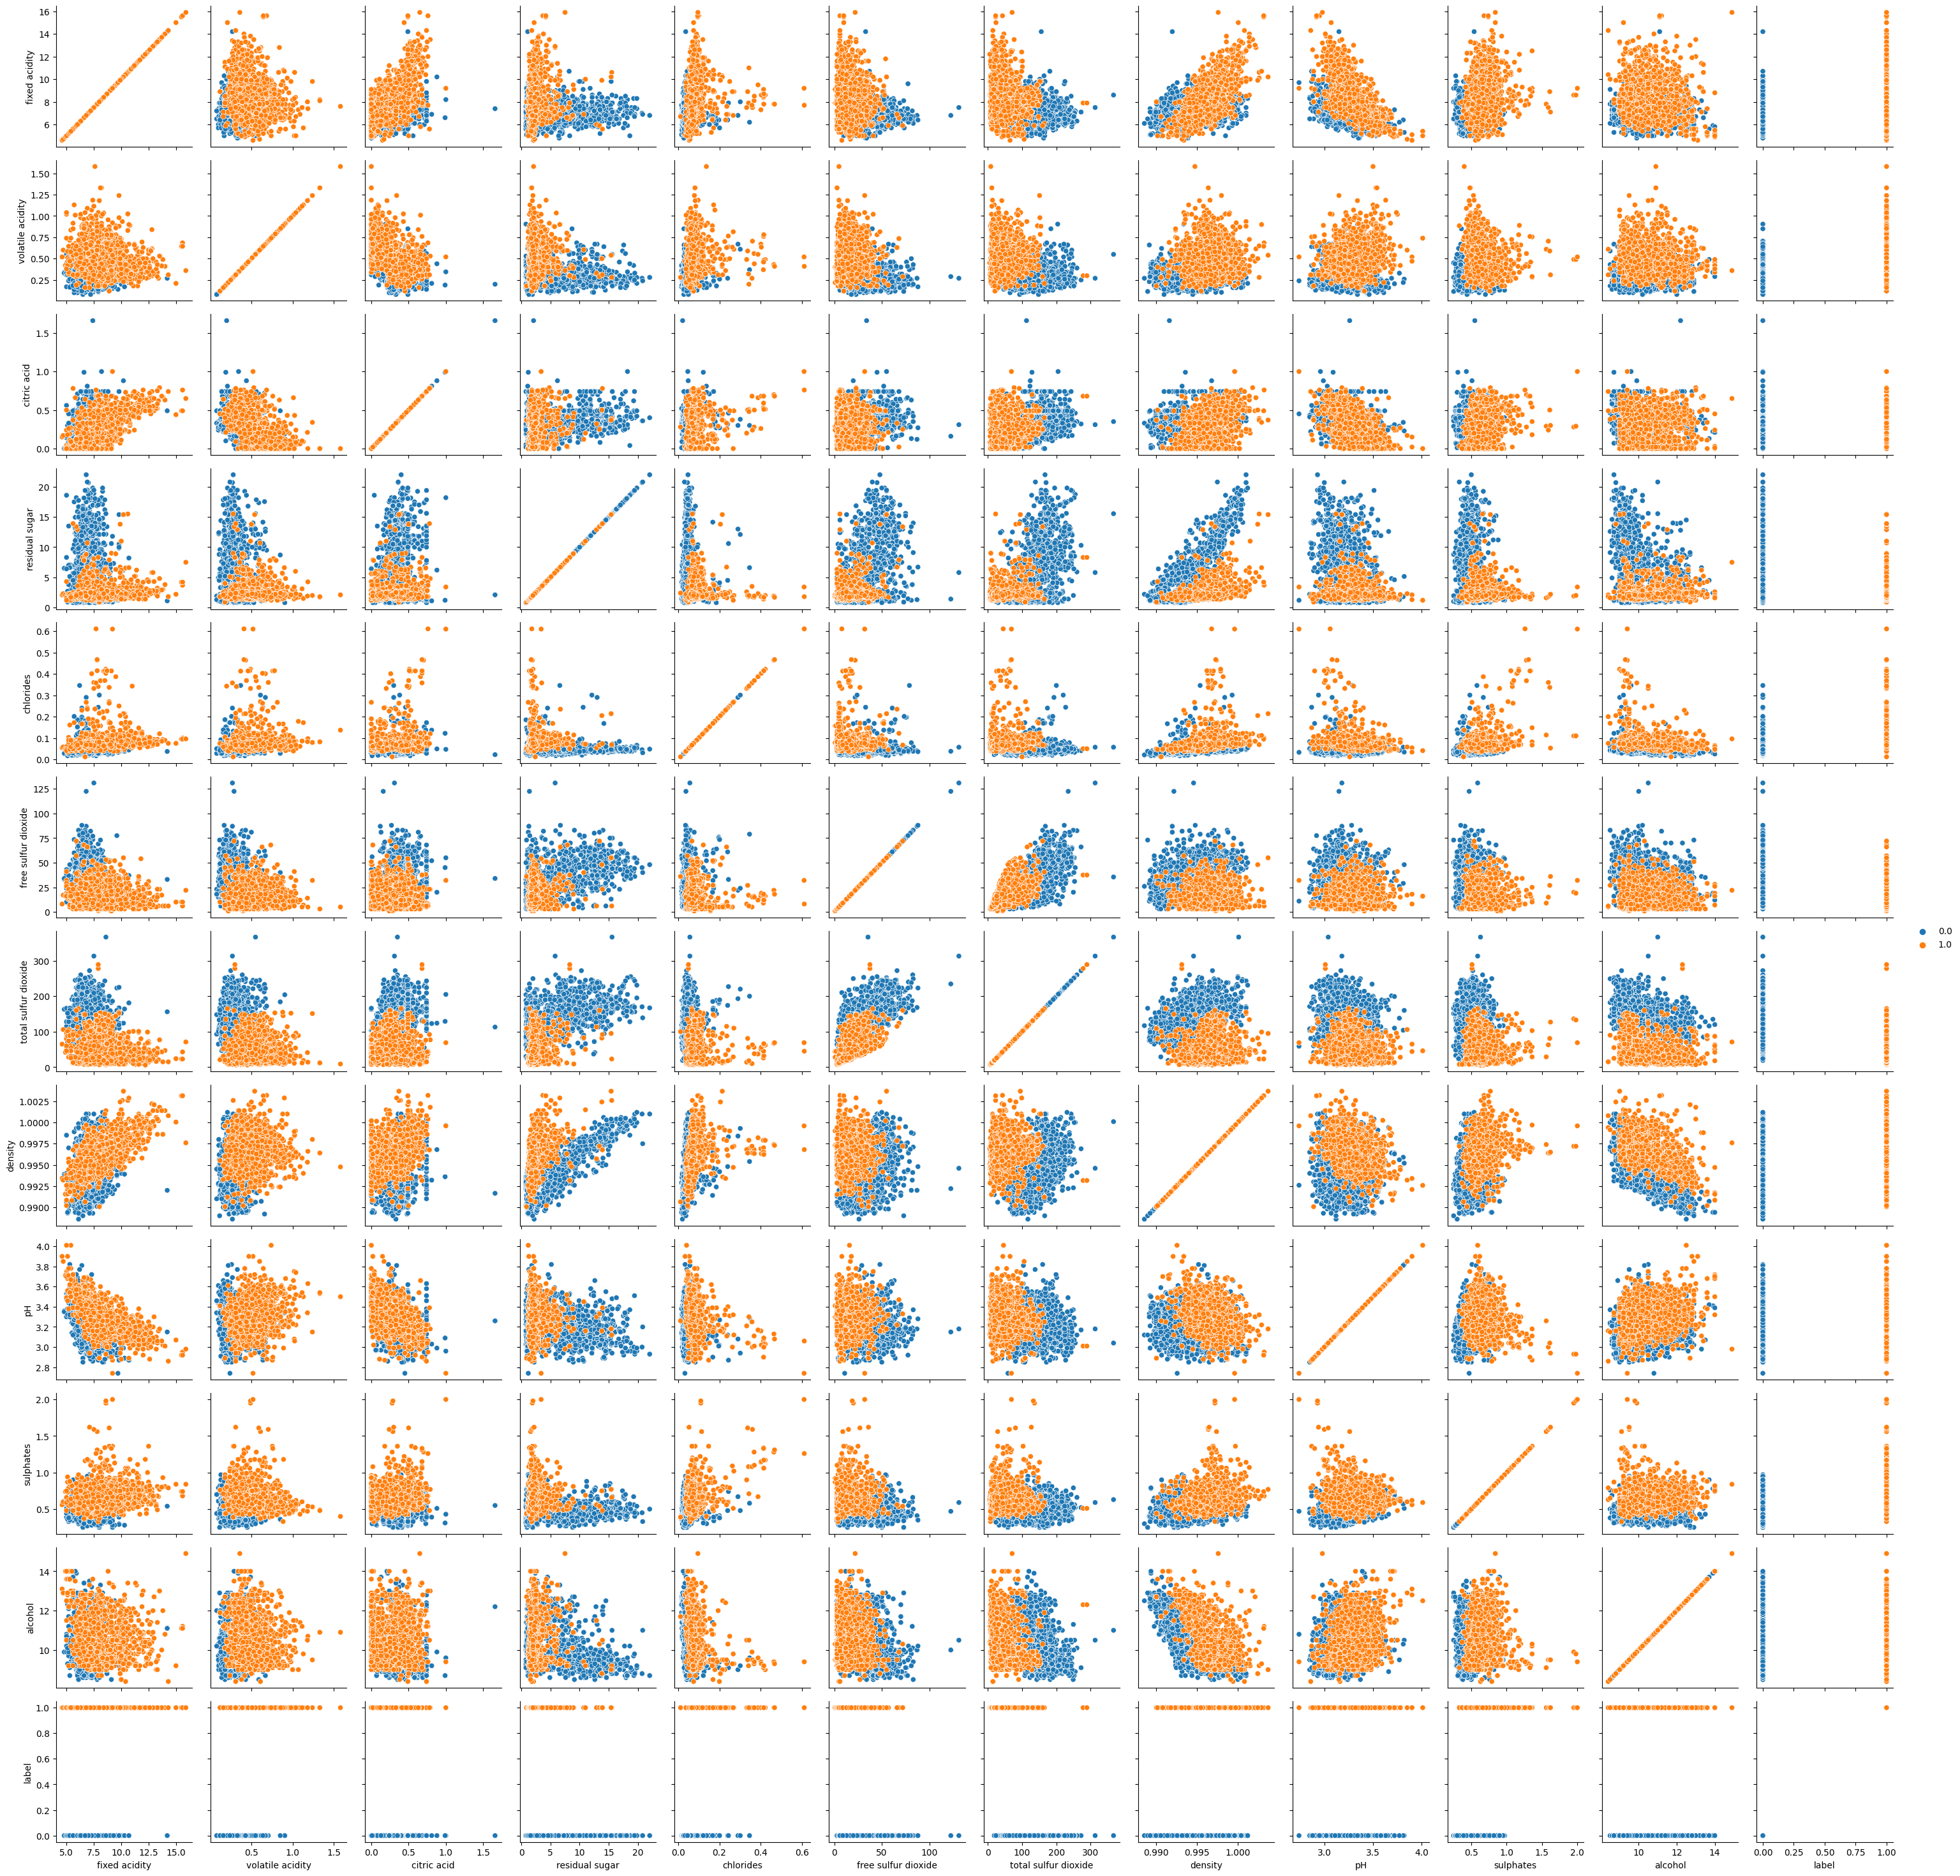

In [4]:
#TODO pairwise plot on 2 dataset
import seaborn as sns

wine_pair = sns.PairGrid(wine)
wine_pair.map(sns.scatterplot, hue = wine["label"])
wine_pair.add_legend()

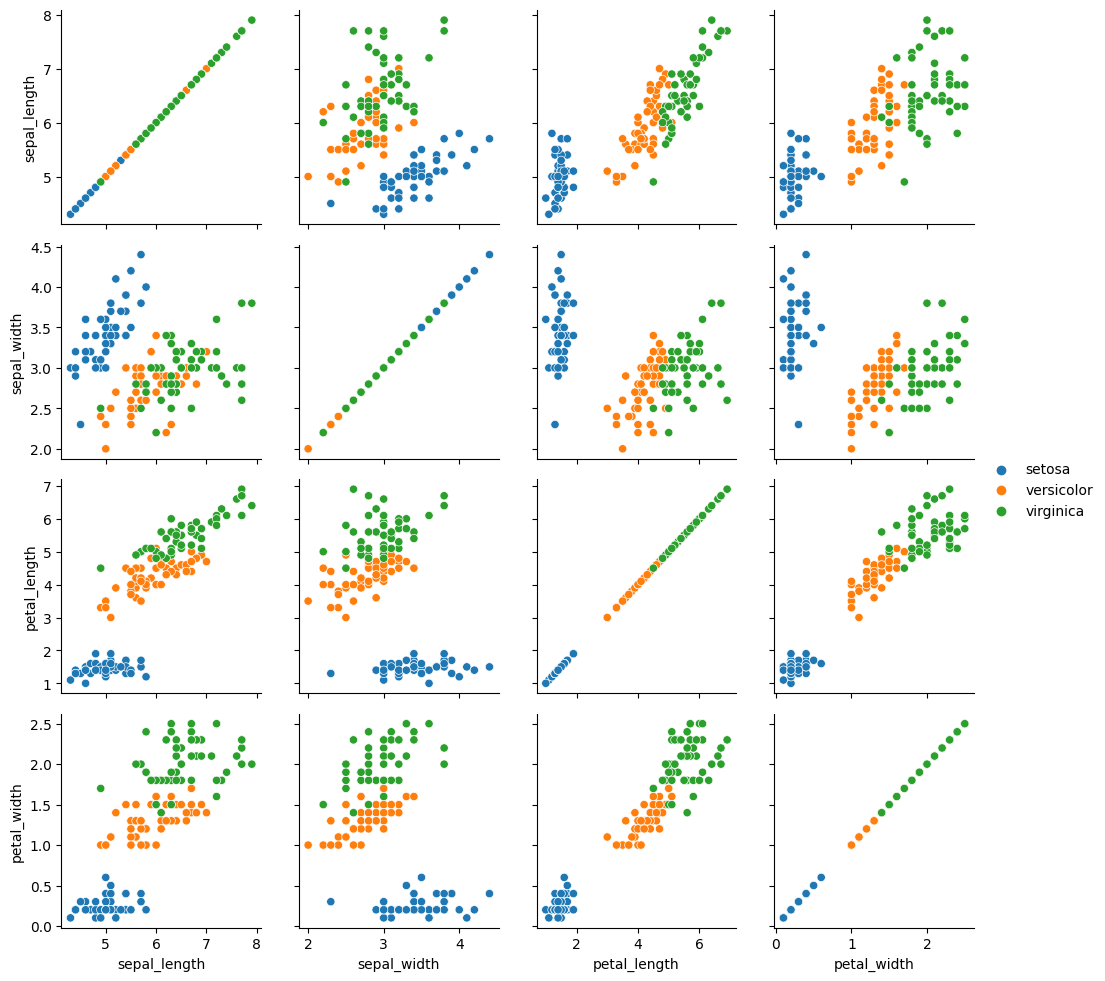

In [5]:
iris_data = sns.load_dataset("iris")
iris_pair = sns.PairGrid(iris_data)
iris_pair.map(sns.scatterplot, hue = iris_data["species"])
iris_pair.add_legend()

**Question 2:**

 2.1 Comment on the plots from the wine dataset, compared to the kinds of plots you saw in the Iris dataset. What similarities or differences do you see? What does the PairGrid visualization help to do?

Response: Compared to the wine datset, the Iris dataset seems to be much more separable based on only one or two features. The species classes are much more easily distinguished for most of the graphs in its pairgrid, despite some overlap with versicolor and virginica. On the other hand, the wine dataset with two features can be hard to distinguish between red or white wine. There is more overlap between the wine classes compared to the iris classes. I think several features are possibly needed to have better classification with the wine dataset. The PairGrid visualization helps to see the relationship of two features. It can help determine what features to use in the modeling process. 

 2.2 Discuss separability of the wine dataset, based on what you have seen so far. Is it separable in two features? Do you think multiple features would change this outcome?

Response: The separability of the wine dataset is not separable in two features. With two features, there seems to be a lot off overlap in white and red wine data samples. With the three acidity features in the first wine scatterplot, it seems to be a little more separable than just two features. However, I think more features would change this outcome to help it be more separable. 

---
## Part 1: Logistic Regression

The first classification algorithm you will implement is Logistic Regression (for binary classification). You do not have to use the class framework provided below, but please make sure to organize and comment your code clearly. 

**Task 4**
Write a LogisticRegression class such that:
 - parameters ($\theta$) are optimized using gradient descent 
 - there is an `evaluate` method that returns the model's accuracy on a given set of data
 - there is a `learning curve` method that plots the cost function against the number of iterations
 - there is a `decision boundary` method that renders a plot of the training data with the decision boundary overlayed (note: this code is provided for you below - make sure you understand how it works) 
 - please vectorize operations as much as possible

In [6]:
#TODO - implement LogisticRegression class

class LogisticRegression():
    
    def __init__(self, X, y, theta, alpha):
        self.X = X
        self.y = y
        self.theta = theta 
        self.alpha = alpha
    
    #  h (hypothesis): returns p(y=1|x) on inputs contained in the design matrix X
    def sigmoid(self, X):
        z = np.dot(X, self.theta)
        sig = 1 / (1 + np.exp(-z))
        return sig
    
    # return predictions of class membership (0,1) of the datapoints in an input matrix X
    def predict(self, X):
        prediction = self.sigmoid(X)
        for i, pred in enumerate(prediction):
            if pred >= 0.5:
                prediction[i] = 1
            else:
                prediction[i] = 0
        return prediction
    
    # cost function J()
    def cost(self):
        m = self.y.shape[0]
        h = self.sigmoid(self.X)
        cost1 = np.dot(self.y.T, np.log(h))
        cost2 = np.dot((1 - self.y).T, np.log(1 - h))
        cost = -((cost1 + cost2))
        return cost
    
    
    # update theta 
    def gradient_descent_step(self):
        m = self.y.size
        h = self.sigmoid(self.X)
        gradient = np.dot(self.X.T, h - self.y) / m
        self.theta = self.theta - self.alpha * gradient
        return gradient
    
    # define a convergence criterion 
    # run gradient descent until convergence 
    def run_gradient_descent(self, threshold):
        losses = []
        curr = self.cost()
        losses.append(curr)
        gradient = self.gradient_descent_step()
        magnitude = np.linalg.norm(gradient)
        # set limit on magnitude to be able to stop alphas that are too large
        while magnitude >= threshold:
            curr = self.cost()
            losses.append(curr)
            gradient = self.gradient_descent_step()
            magnitude = np.linalg.norm(gradient)
        return losses
    
    # return the model's accuracy on an input (X,y) dataset 
    def evaluate(self, X, y):
        predictions = self.predict(X)
        m = self.y.size
        accuracy = 0
        for i, pred in enumerate(predictions):
            if pred == y[i]:
                accuracy += 1
        accuracy = accuracy / m
        return accuracy
    
    # plot cost function over num gradient descent steps
    def learning_curve(self, losses):
        fig, ax = plt.subplots()
        ax.plot(range(len(losses)), losses)
        ax.set_xlabel("Number of steps")
        ax.set_ylabel("MSE Loss")
        ax.set_title("Learning Curve")
        plt.show()
    
    # plot decision boundary, based on current model parameters
    # you may edit or add cases to this, to accommodate plotting the Iris data too
    def decision_boundary(self, dset, xlab, ylab):
        X = self.X[:,1:]
        #theta = [t[0] for t in self.theta]
        y = np.reshape(self.y, (-1))
        xax = [np.min(X[:, 0]), np.max(X[:, 0])]
        yax = -1.0*(self.theta[0] + np.dot(self.theta[1], xax)) / self.theta[2]
        plt.scatter(x=X[y==0,0],y=X[y==0,1],c='red',edgecolor='black')
        plt.scatter(x=X[y==1,0],y=X[y==1,1],c='blue',edgecolor='black')
        plt.plot(xax, yax)
        if dset=='wine':
            plt.legend(['red','white', 'decision boundary'])
            plt.xlabel(xlab)  # name it as the your input x- and y-
            plt.ylabel(ylab)
            plt.title('Wine')
        elif dset=='iris':
            plt.legend(['setosa','versicolor', 'decision boundary'])
            plt.xlabel(xlab)
            plt.ylabel(ylab)
            plt.title("Iris Dataset")            
        plt.show()

**Task 5**
Verify that your method works on the Iris dataset. The Iris dataset is originally a 3-class dataset, but for this purpose, please select two of the 3 classes on which to perform binary classification (and again, use the 2 features "petal length" and "petal width"). You do not have to split this dataset further into training and testing sets.
 - Display the decision boundary, superimposed on the scatterplot of the data
 - Add/modify the `decision_boundary` function if needed to accommodate changes in plotting for the Iris dataset.

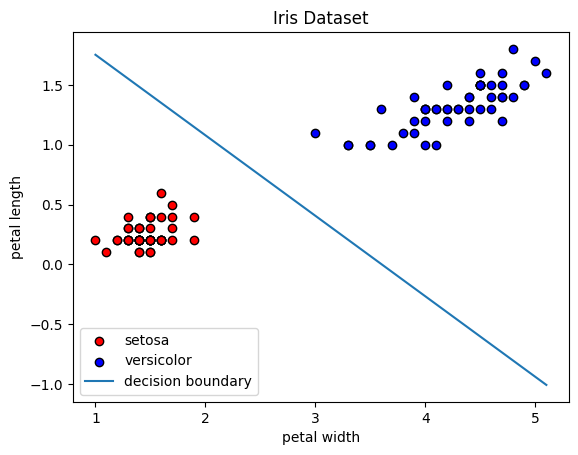

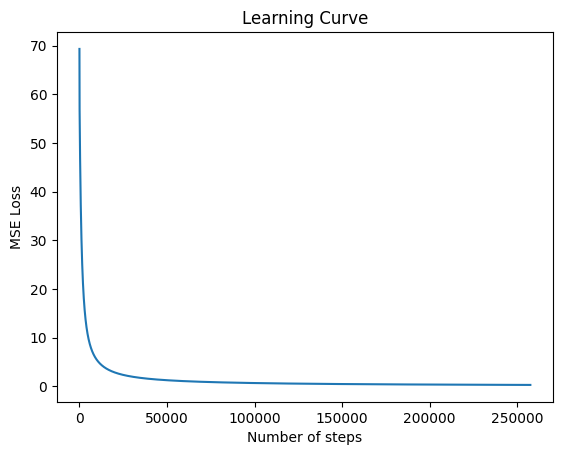

Accuracy: 100.0%


In [7]:
# TODO Task 5

# design matrix of degree one
train_x = np.ones((len(iris.data[iris.target != 2]), 3))
train_x[:,1] = iris.data[iris.target != 2, 2]
train_x[:,2] = iris.data[iris.target != 2, 3]

train_y = iris.target
train_y = np.delete(iris.target, np.where(iris.target == [2]))

# run logistic regression
alpha = 0.01
theta = np.array([0,0,0])
iris_lr = LogisticRegression(train_x, train_y, theta, alpha)
losses = iris_lr.run_gradient_descent(0.001)
iris_lr.decision_boundary('iris', 'petal width', 'petal length')

# plot learning curve
iris_lr.learning_curve(losses)

# calculate accuracy
accuracy = iris_lr.evaluate(train_x, train_y)
print(f"Accuracy: {accuracy * 100}%")

**Task 6**
Explore your method on the wine dataset, expanding from 2 dimensions into multiple dimensions.
 - Split the wine dataset into a training set and a test set (80/20 split). We recommend shuffling the data first.
 - Then, perform feature scaling (standardizing to mean = 0 and variance = 1) on both the training and test sets. Please write your own function to perform this standardization, rather than using a module from scikit-learn. Note that it is recommended to calculate the scaling parameters (mean and variance) from the training set, and then apply those same paramters to scale the test set, so that the test set does not influence the training in any way. 
 - **we are not expecting to get 100% accuracy on any of the feature combinations**, but an empirical lower bound for the accuracy is given. That is to say, your approach is probably right, as long as your performance on the test set is higher than the number.
 - Train your model on the wine training data with the following 4 [feature combinations] : percentage to beat during test
   * [fixed acidity, volatile acidity, residual sugar] : 85%
   * [density, pH, alcohol] : 75%
   * [fixed acidity, volatile acidity, chlorides] : 85%
   * [all 11 features]: 95%
   * note that the features list is: fixed acidity/volatile acidity/citric acid/residual sugar /chlorides/free sulfur dioxide/total sulfur dioxide/density/pH/sulphates/alcohol
 - Display the decision boundary plots (plot in 2d, so please just choose any 2 of your features as x- and y-). 
 - Display plots of the learning curve 
 - Report the model's final accuracy on the test set

In [8]:
# Standardizing the wine data to mean = 0 and variance = 1
def standardization(train_x, test_x):
    for i in range(train_x.shape[1]):
        mean = train_x[:,i].mean()
        variance = train_x[:,i].std()
        train_x[:, i]  = (train_x[:, i] - mean) / variance
        test_x[:, i]  = (test_x[:, i] - mean) / variance
    return train_x, test_x

In [9]:
# splitting the wine data into training and test set
from sklearn.model_selection import train_test_split

x_wine = wine.loc[:, wine.columns != "label"]
y_wine = wine["label"]

train_x, test_x, train_y, test_y = train_test_split(x_wine, y_wine, random_state = 0, train_size = 0.8)


# converting dataframes to numpy arrays
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()

# standardizing the data 
train_x, test_x = standardization(train_x, test_x)

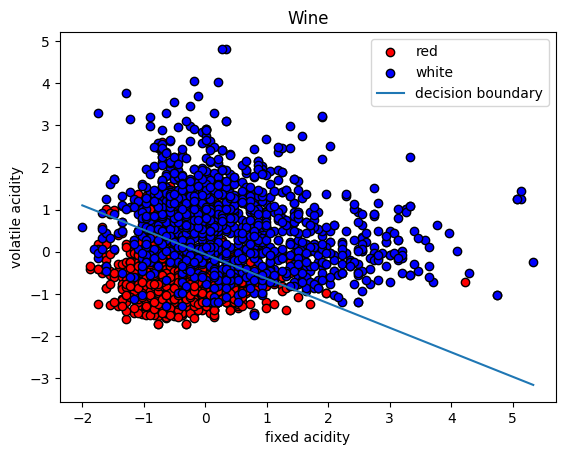

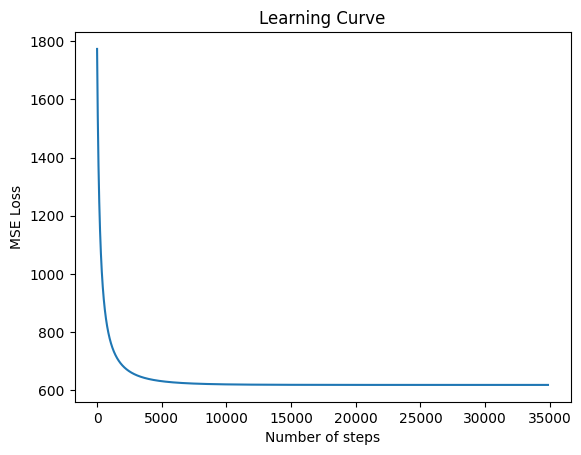

Training accuracy: 90.77764751856195%
Testing accuracy: 22.50879249706917%


In [10]:
# Test 1: fixed acidity (index 0), volatile acidity (index 1), and residual sugar (index 3)

# create design matrix
X1 = np.ones((len(train_x), 4))
X1[:, 1] = train_x[:, 0]
X1[:, 2] = train_x[:, 1]
X1[:, 3] = train_x[:, 3]

# logistic regression
alpha = 0.01
theta = np.array([0,0,0,0])
wine_lr1 = LogisticRegression(X1, train_y, theta, alpha)
losses = wine_lr1.run_gradient_descent(0.0001)
wine_lr1.decision_boundary('wine', 'fixed acidity', 'volatile acidity')

# plot of learning curve
wine_lr1.learning_curve(losses)

# calculate accuracy for test and training data
test_X1 = np.ones((len(test_x), 4))
test_X1[:, 1] = test_x[:, 0]
test_X1[:, 2] = test_x[:, 1]
test_X1[:, 3] = test_x[:, 3]

accuracy = wine_lr1.evaluate(X1, train_y)
print(f"Training accuracy: {accuracy * 100}%")
accuracy = wine_lr1.evaluate(test_X1, test_y)
print(f"Testing accuracy: {accuracy * 100}%")

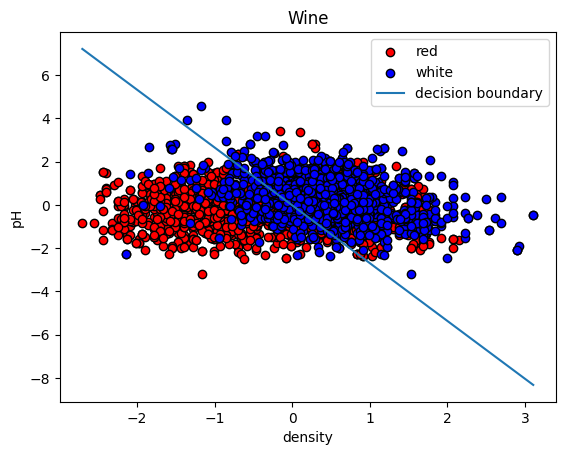

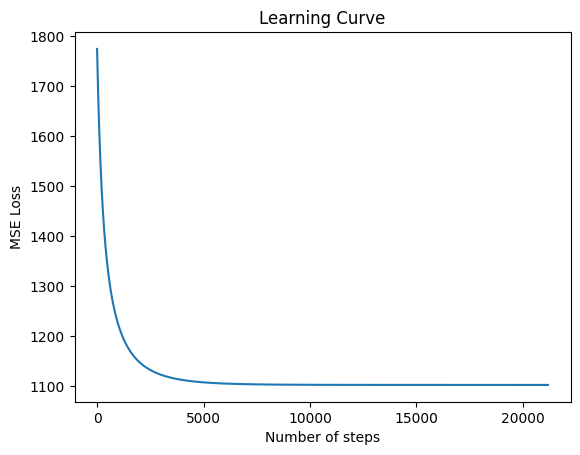

Training accuracy: 79.8358733880422%
Testing accuracy: 20.43767096522079%


In [11]:
# Test 2: density (index 7), pH (index 8), and alcohol (index 10)

# create design matrix
X2 = np.ones((len(train_x), 4))
X2[:, 1] = train_x[:, 7]
X2[:, 2] = train_x[:, 8]
X2[:, 3] = train_x[:, 10]

# logistic regression
alpha = 0.01
theta = np.array([0,0,0,0])
wine_lr2 = LogisticRegression(X2, train_y, theta, alpha)
losses = wine_lr2.run_gradient_descent(0.0001)
wine_lr2.decision_boundary('wine', 'density', 'pH')


# plot of learning curve
wine_lr2.learning_curve(losses)

# calculate accuracy for test and training data
test_X2 = np.ones((len(test_x), 4))
test_X2[:, 1] = test_x[:, 7]
test_X2[:, 2] = test_x[:, 8]
test_X2[:, 3] = test_x[:, 10]

accuracy = wine_lr2.evaluate(X2, train_y)
print(f"Training accuracy: {accuracy * 100}%")
accuracy = wine_lr2.evaluate(test_X2, test_y)
print(f"Testing accuracy: {accuracy * 100}%")

C:\Users\marys\AppData\Local\Temp\ipykernel_33132\3549141116.py:32: RuntimeWarning: divide by zero encountered in log
  cost2 = np.dot((1 - self.y).T, np.log(1 - h))


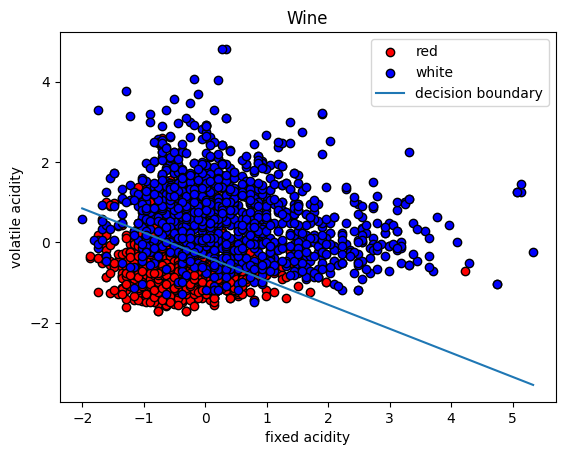

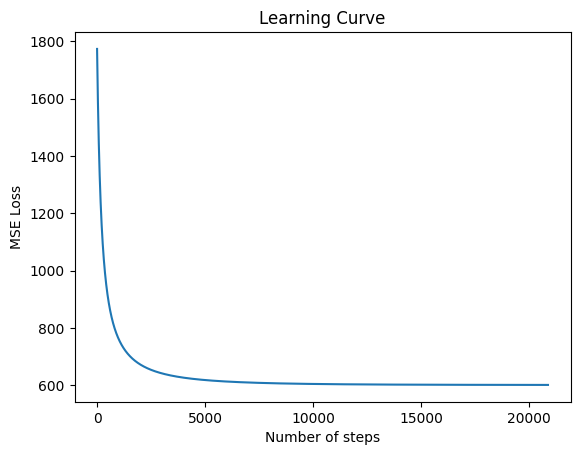

Training accuracy: 93.1223134036733%
Testing accuracy: 22.704181320828447%


In [12]:
# Test 3:  fixed acidity (index 0), volatile acidity (index 1), chlorides (index 4)

# create design matrix
X3 = np.ones((len(train_x), 4))
X3[:, 1] = train_x[:, 0]
X3[:, 2] = train_x[:, 1]
X3[:, 3] = train_x[:, 4]

# logistic regression
alpha = 0.01
theta = np.array([0,0,0,0])
wine_lr3 = LogisticRegression(X3, train_y, theta, alpha)
losses = wine_lr3.run_gradient_descent(0.0001)
wine_lr3.decision_boundary('wine', 'fixed acidity', 'volatile acidity')


# plot of learning curve
wine_lr3.learning_curve(losses)

# calculate accuracy for test and training data
test_X3 = np.ones((len(test_x), 4))
test_X3[:, 1] = test_x[:, 0]
test_X3[:, 2] = test_x[:, 1]
test_X3[:, 3] = test_x[:, 4]

accuracy = wine_lr3.evaluate(X3, train_y)
print(f"Training accuracy: {accuracy * 100}%")
accuracy = wine_lr3.evaluate(test_X3, test_y)
print(f"Testing accuracy: {accuracy * 100}%")

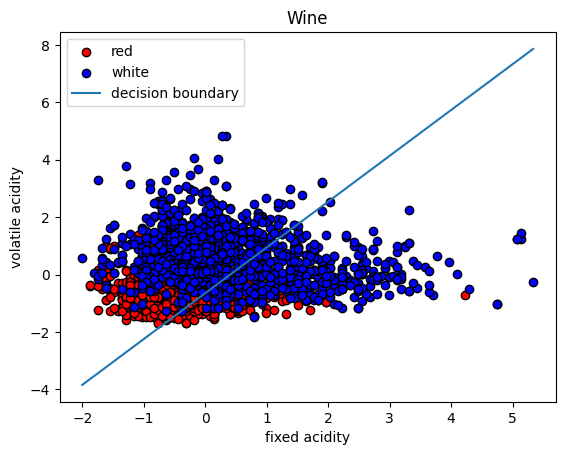

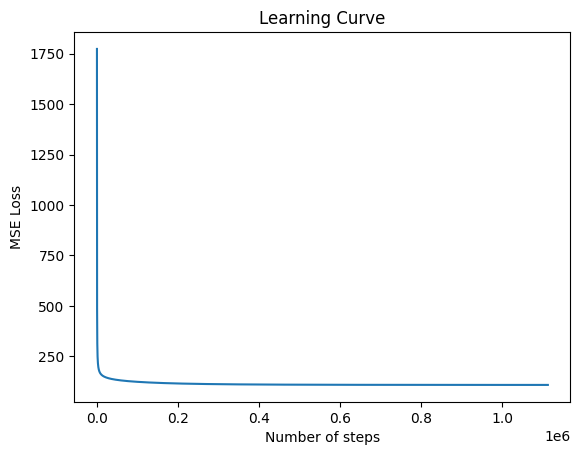

Training accuracy: 99.21844470496288%
Testing accuracy: 24.697147323173112%


In [13]:
# Test 4:  all 11 features

# create design matrix
X4 = np.ones((len(train_x), train_x.shape[1] + 1))
for i in range(train_x.shape[1]):
    X4[:, i + 1] = train_x[:, i]

# logistic regression
alpha = 0.01
theta = np.zeros((X4.shape[1],))
wine_lr4 = LogisticRegression(X4, train_y, theta, alpha)
losses = wine_lr4.run_gradient_descent(0.0001)
wine_lr4.decision_boundary('wine', 'fixed acidity', 'volatile acidity')


# plot of learning curve
wine_lr4.learning_curve(losses)

# calculate accuracy for test and training data
test_X4 = np.ones((len(test_x), train_x.shape[1] + 1))
for i in range(test_x.shape[1]):
    test_X4[:, i + 1] = test_x[:, i]


accuracy = wine_lr4.evaluate(X4, train_y)
print(f"Training accuracy: {accuracy * 100}%")
accuracy = wine_lr4.evaluate(test_X4, test_y)
print(f"Testing accuracy: {accuracy * 100}%")

**Question 3:**

 3.1. Describe the convergence condition you selected.

Response: The convergence condition I used was when the norm of the gradient calculated for that round was less than the threshold. The threshold I used was 0.001 for the iris and 0.0001 for the wine dataset. I chose a smaller convergence for the wine dataset because more features were being compared, and I wanted to see if it would converge better with a smaller threshold. 

 3.2. What was the model's training accuracy on the Iris dataset (for the two classes you selected)?

Response: The model's training accuracy on the Iris dataset was 100% for setosa and versicolor.

 3.3. What was the model's training and test accuracy on the wine quality dataset? Which one gives the best performance? Does that live up to your expectation and why?

Response: The model's training accuracy on the four test cases was around 80%-99%. The worst training accuracy was for density, pH, and alcohol leve of approximately 80%. The best training accuracy was for all 11 features for approximately an accuracy of 99%. The test accuracy for my dataset was around 20%-25% for all tests. The best prediction was for the test with all 11 features. Thus, the test with all 11 features gave me the best performance. This lived up to my expectation since all the features were at play here and not just a select 3. This did not meet the acceptable lower bound.  I think this is due to the fact that not all the features carry the same weight as others in it, causing the models to be inaccurate. I think the wine dataset would perform better with some sort of regularization technique. 

---
## Part 2: Locally Weighted Linear Regression 

In this second part, you will write a locally weighted linear regression class, and apply it to a synthetic dataset. This dataset is included as a text file on Brightspace, and is called 'LWR_samples.npy'. Each line of the text file represents one training example in the format $x^{(i)},y^{(i)}$ (i.e. the delimiter is a comma). 

#### **Task 7**
- Load the synthetic data, from the file `assignment2_LWR_samples.npy`
- Interpret the $(x^{(i)},y^{(i)})$ pairs, and plot them with a scatter plot.
- Implement a LocallyWeightedLR class (example framework below). To make a prediction at input $x$, weight each training example according to the function we discussed in lecture: 
$$ w^{(i)} = \exp\big(-\frac{(x^{(i)} - x)^2}{2\tau^2} \big), $$
where $\tau$ is a bandwidth parameter that you will experiment with.
- To compute the local linear regression parameters ($\theta$) at each query point, use the closed-form solution. The formula is:
$$ \theta = (X^TWX)^{-1} X^TWy, $$
where $X$ is the design matrix formed by your training inputs (make sure to include the intercept term), $W$ is a diagonal matrix whose $i^{th}$ diagonal entry corresponds to the weight of the $i^{th}$ training example (which depend on the point at which you are making a prediction), and $y$ is a column vector containing the target labels of the training examples.

- Run this regression model to make predictions at the specific input points x = 4, x = 0.5, and x = -3. Use $\tau$ = 0.5. Report the values of the local regression parameters $\theta$ obtained for each of these 3 points.
- Now, generate an array of predictions corresponding to equally spaced input points (in the range of [-4.5, 4.5] in steps of 0.05), again using $\tau$ = 0.5. Generate a plot showing the predictions from Locally Weighted Linear Regression on each of these input points, superimposed on (and colored differently from) the training data.
- Repeat the previous step, now using bandwidth parameters $\tau = 0.1$ and $\tau = 1.5$. Plot the results, again superimposed on the training data (and in a different color).

In [15]:
#TODO - Implement Locally-Weighted Linear Regression class

class LocallyWeightedLR():
    
    def __init__(self, X, y, tau):
        self.X = X
        self.y = y
        self.tau = tau 
        
    # use bandwidth variable tau to compute weights for each training point.  
    # return a diagonal matrix with w_i on the diagonal (for vectorization)
    # note that the values of w_i depend upon the value of the input query point x.
    def compute_weights(self, x):
        numerator = -np.power((self.X[:,1] - x), 2)
        denominator = 2 * self.tau * self.tau
        w_i = np.exp(numerator / denominator)
        W = np.diag(w_i)
        return W
    
    # analytical solution for the local linear regression parameters at the input query point x.
    # this should involve calling the above method compute_weights.
    def compute_theta(self, x):
        W = self.compute_weights(x)
        inv = np.linalg.inv(np.matmul(np.matmul(self.X.T, W), self.X))
        theta = np.matmul(np.matmul(np.matmul(inv, self.X.T), W), self.y)
        return theta
    
    # prediction for an input x
    # also return the local linear regression parameters (theta) for this x.
    def predict(self, x, theta):
        theta = self.compute_theta(x)
        pred = theta[0] + theta[1] * x
        return pred

In [17]:
# Load LWR_samples.npy
data = np.load('C:\\Users\\marys\\OneDrive\\Documents\\MachineLearning\\cs4262-5262-2023S\\Assignment2\\assignment2-LWR_samples.npy')

# seprate into x and y components
x_vals = data[:,0]
y_vals = data[:,1]

train_x = np.ones((len(x_vals), 2))
train_x[:,1] = x_vals


Text(0.5, 1.0, 'Artificial Dataset')

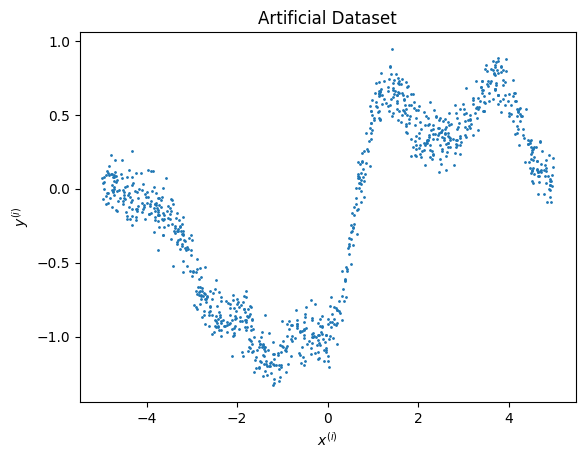

In [18]:
# plot artificial dataset
fig, ax = plt.subplots()
ax.scatter(x_vals, y_vals, s= 1)
ax.set_xlabel("$x^{(i)}$")
ax.set_ylabel("$y^{(i)}$")
ax.set_title("Artificial Dataset")

In [19]:
# theta for tau = 0.5 on different x values
tau = 0.5

x = [4, 0.5, -3]
thetas = []
for i in range(len(x)):
    lwr_test1 = LocallyWeightedLR(train_x, y_vals, tau)
    theta = lwr_test1.compute_theta(x[i])
    print(f"Theta for x = {x[i]}: {theta}")
    pred = lwr_test1.predict(x[i], theta)
    print(f"Prediction for x = {x[i]}: {pred}\n")

Theta for x = 4: [ 1.78634424 -0.32029129]
Prediction for x = 4: 0.5051790815889363

Theta for x = 0.5: [-0.84244208  1.11142885]
Prediction for x = 0.5: -0.28672765229972974

Theta for x = -3: [-2.08390745 -0.52159246]
Prediction for x = -3: -0.5191300767604887



In [20]:
# testing on range -4.5 to 4.5 with different taus

input_array = np.arange(-4.5, 4.5, 0.05)
tau = 0.5

taus = [0.5, 0.1, 1.5]

preds = {}
for i in range(len(taus)):
    lwr_test2 = LocallyWeightedLR(train_x, y_vals, taus[i])
    predictions = []
    for x in input_array:
        theta = lwr_test2.compute_theta(x)
        predictions.append(lwr_test2.predict(x, theta))
        preds["pred{0}".format(i + 1)] = predictions

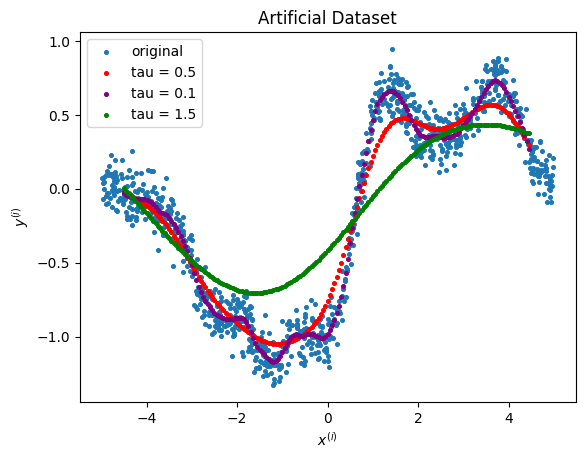

In [21]:
colors = ["red", "purple", "green"]
fig, ax = plt.subplots()
ax.scatter(x_vals, y_vals, s = 7)
for i in range(len(taus)):
    ax.scatter(input_array, preds["pred{0}".format(i + 1)] , color = colors[i], s = 7)
ax.set_xlabel("$x^{(i)}$")
ax.set_ylabel("$y^{(i)}$")
ax.set_title("Artificial Dataset")
plt.legend(['original', 'tau = 0.5', 'tau = 0.1', 'tau = 1.5'])
plt.show()


**Question 4**: 
 - Do the local linear regression parameters $\theta$ returned for the 3 input points (4, 0.5, -3) agree with what you expect, based on the training data in the neighborhood of those points? Why or why not?
 
Response: Yes, the thetas for those three input points agree with what I would expect. If you compare them to the thetas calculated by the training data around those points, the thetas are similar. This is because those thetas are calculated based on the training data in the neighborhood around that point due to the calculation of the weights.


**Question 5:**  
 - Based on your observations, describe the effect of increasing and decreasing $\tau$, in the context of over/underfitting.
 
Response: Too small of a tau will cause overfitting, as seen when tau = 0.1. Too big of a tau will cause underfitting, as seen when tau = 1.5. For the model with our synthetic data, a tau of 0.5 seems to be the ideal fit for our data. 

---
## Part 3: Submission 

Please upload a clean version of your work to Brightspace by the deadline.

Below, please acknowledge your collaborators as well as any resources/references (beyond guides to Python syntax) that you have used in this assignment: